# Database Analysis Project

## Analyst: Isaac Tavares

## Using Pandas, Matplotlib, and Seaborn in Python and Statistics

##### _Pandas for general data manipulation and analysis;_

##### _Matplotlib and Seaborn for data visualization._

##### _This database is geared towards academic and educational data._

##### Based on this database, we will verify whether longer study time and healthy habits, such as frequent exercise, good mental health, and a good diet, positively affect students' grades, as well as determine whether increased screen time on social   media negatively impacts students' grade performance.
##### Finally, we will analyze whether there is a difference between genders and what the  level of stability is for each.


In [ ]:
# pip install pandas matplotlib seaborn

# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing and understanding database

In [3]:
# Reading csv file
df = pd.read_csv(r"student_habits_performance.csv")

In [4]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


## Which habits have the biggest impact on students performance?

In [6]:
# Data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

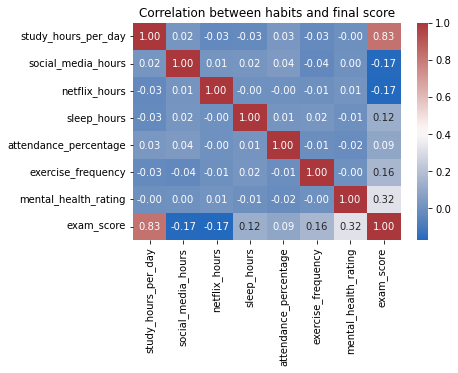

In [17]:
# Choosing numeric columns (int64 and float64, but "age")
columns = [
    "study_hours_per_day",
    "social_media_hours",
    "netflix_hours",
    "sleep_hours",
    "attendance_percentage",
    "exercise_frequency",
    "mental_health_rating",
    "exam_score",
]

# Plot "heatmap"
sns.heatmap(df[columns].corr(), annot=True, fmt='.2f', cmap="vlag")
plt.title("Correlation between habits and final score")
plt.show()

##### By examining exclusively the correlation between the “exam_score” and the other variables, we infer that there is a significant positive correlation of 0.83 between the “exam_score” and “study_media_hours”.
##### Furthermore, we can also infer that there is a significant negative correlation between the variables “exam_score” and “social_media_hours” of -0.17, following opposite trends.

##### Another significant correlation exists between “exam_score” and “mental_health_rating”, with a positive correlation coefficient of 0.32.

## Do students who study more perform better?

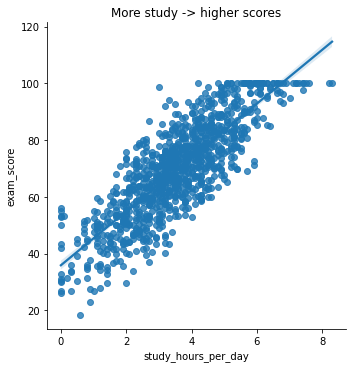

In [18]:
# Scatter plot with regression line
# x = "study_hours_per_day" / y = "exam_score"

sns.lmplot(data=df, x="study_hours_per_day", y="exam_score")
plt.title("More study -> higher scores")
plt.show()

##### Based on the regression line shown in the graph, we can infer a clear positive trend, indicating that the more time students dedicate to studying, the higher grades they tend to obtain compared to those who dedicate less time to studying.

In [22]:
# Comparing means: who study >5h x <2h

filter_study_more = df["study_hours_per_day"] > 5
filter_study_less = df["study_hours_per_day"] < 2

group_study_more = df[filter_study_more]["exam_score"]
group_study_less = df[filter_study_less]["exam_score"]

print("AVG scores (study >5h):", group_study_more.mean())
print("AVG scores (study <2h):", group_study_less.mean())


AVG scores (study >5h): 90.79419354838711
AVG scores (study <2h): 45.56390977443609


##### We can see that the average number of students who study more than 5 hours a day is 90.80, while the number of students who study less than 2 hours a day is only 45.60, confirming what was reported above.

## Does time spent on social media affect student performance?

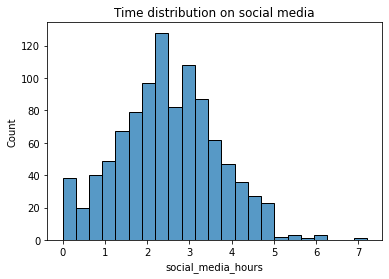

In [24]:
# Social media: general distribution (Histogram)
# x = "social_media_hours"

sns.histplot(data=df, x="social_media_hours")
plt.title("Time distribution on social media")
plt.show()

##### The graph suggests that most students in the database spend around 2 to 3 hours a day on social media. 
##### Furthermore, a significant number use social media for less than 1 hour, while others spend around 4 to 5 hours a day.

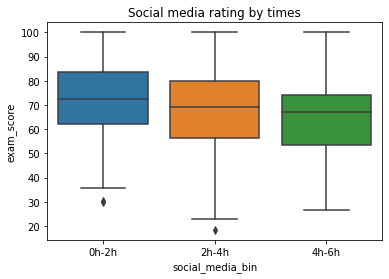

In [28]:
# Evaluating AVG scores across different time intervals (bins) of time spent on social media
# ["0h-2h", "2h-4h", "4h-6h", "+6h"]

df["social_media_bin"] = pd.cut(
    df["social_media_hours"],
    bins = [0, 2, 4, 6],
    labels = ["0h-2h", "2h-4h", "4h-6h"]
)

# Plot boxplot
sns.boxplot(x="social_media_bin", y="exam_score", data=df)
plt.title("Social media rating by times")
plt.show()

##### From the boxplots, we can infer that the median score of these students tends to decrease as the number of hours spent using social media per day increases. Another important point is that the minimum value of the lower tail of students who spend less time on social media is greater than the lowest values ​​of the other lower tails.

## Do healthier students perform better?

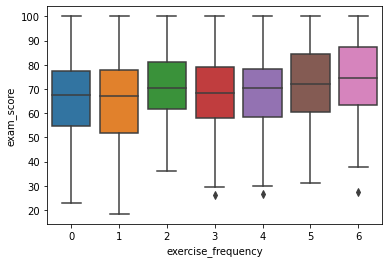

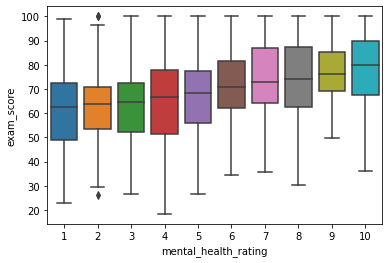

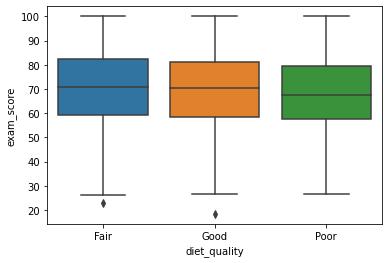

In [29]:
# Frequency of physical exercises 

for columns in ["exercise_frequency", "mental_health_rating", "diet_quality"]:
    sns.boxplot(x=columns, y="exam_score", data=df)
    plt.show()

##### Analyzing the boxplots above, we can infer that healthy habits can lead to better academic levels:
##### 1. The more times a student exercises per week, the higher the median score tends to be.
##### 2. Students with better mental health also tend to have better grades.
##### 3. A healthy diet also shows a small influence on increasing students' scores.

## Is there difference in scores between women and men?

In [30]:
# Statistics by gender (mean and standard deviation)

df.groupby(["gender"])["exam_score"].agg(["mean", "std"])

,mean,std
gender,,
Female,69.741372,16.899351
Male,69.368344,17.150875
Other,70.647619,13.755890


##### Based on the average value presented above, it can be inferred that there is no significant difference between genders. 
##### Comparing the standard deviation between genders, a greater stability in the average score is observed among women, and greater unpredictability among the averages achieved by men.

In [31]:
# Evaluation on gender distribution

df["gender"].value_counts(normalize=True)

Female    0.481
Male      0.477
Other     0.042
Name: gender, dtype: float64